In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
fruits = np.load('fruits_300.npy')
fruits.shape # 사진 데이터 300 장인데 가로 100, 세로100 인 사진 이다.

(300, 100, 100)

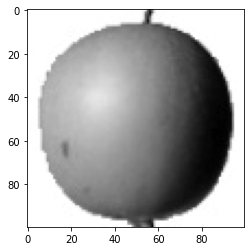

In [9]:
plt.imshow(fruits[0],cmap ='gray_r') # 0번째 사진
plt.show()

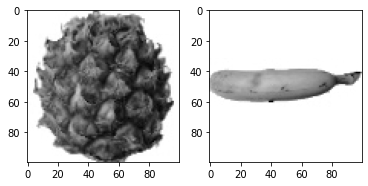

In [13]:
# 사과 데이터
# 사과 100 파인애플 100 바나나 100 

fig, axs = plt.subplots(1,2)

axs[0].imshow(fruits[100], cmap='gray_r')
axs[1].imshow(fruits[200], cmap='gray_r')

In [14]:
# 파인애플 / 바나나

# 과일 300, 가로 100 세로 100 인 데이터일뿐 -> 정답 x

fruits[0]

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [15]:
# 값의 대한 픽셀값 0흰색  ~ 255 검정색

apple = fruits[:100].reshape(-1,10000) # 매개변수 -1 : 2차원배열 , 10000 개의 픽셀
pineapple = fruits[100:200].reshape(-1,10000) # 매개변수 -1 : 2차원배열 , 10000 개의 픽셀
banana = fruits[200:].reshape(-1,10000) # 매개변수 -1 : 2차원배열 , 10000 개의 픽셀

In [16]:
apple.shape # 사진 100장이 있는데 10000개의 픽셀

(100, 10000)

In [17]:
apple[0] # 일자 배열~ 로 모양 바꿔줌

array([1, 1, 1, ..., 1, 1, 1], dtype=uint8)

In [19]:
apple # 한줄 = 사진 한장

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [2, 2, 2, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [20]:
# 사진 한장의 평균값
apple.mean(axis=1) # 1은 세로에다가 평균 작성

array([ 88.3346,  97.9249,  87.3709,  98.3703,  92.8705,  82.6439,
        94.4244,  95.5999,  90.681 ,  81.6226,  87.0578,  95.0745,
        93.8416,  87.017 ,  97.5078,  87.2019,  88.9827, 100.9158,
        92.7823, 100.9184, 104.9854,  88.674 ,  99.5643,  97.2495,
        94.1179,  92.1935,  95.1671,  93.3322, 102.8967,  94.6695,
        90.5285,  89.0744,  97.7641,  97.2938, 100.7564,  90.5236,
       100.2542,  85.8452,  96.4615,  97.1492,  90.711 , 102.3193,
        87.1629,  89.8751,  86.7327,  86.3991,  95.2865,  89.1709,
        96.8163,  91.6604,  96.1065,  99.6829,  94.9718,  87.4812,
        89.2596,  89.5268,  93.799 ,  97.3983,  87.151 ,  97.825 ,
       103.22  ,  94.4239,  83.6657,  83.5159, 102.8453,  87.0379,
        91.2742, 100.4848,  93.8388,  90.8568,  97.4616,  97.5022,
        82.446 ,  87.1789,  96.9206,  90.3135,  90.565 ,  97.6538,
        98.0919,  93.6252,  87.3867,  84.7073,  89.1135,  86.7646,
        88.7301,  86.643 ,  96.7323,  97.2604,  81.9424,  87.1

In [22]:
# 사과의 평균
# (과일사진)  - 사과사진의 평균값) 이 0에 가까울수록 사과 사진의 가깝다!! -> 비지도 학습

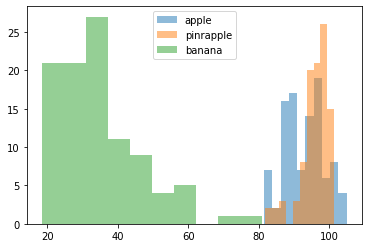

In [23]:
plt.hist(np.mean(apple,axis=1),alpha =0.5)
plt.hist(np.mean(pineapple,axis=1),alpha =0.5)
plt.hist(np.mean(banana,axis=1),alpha =0.5)
plt.legend(['apple','pinrapple','banana'])
plt.show()

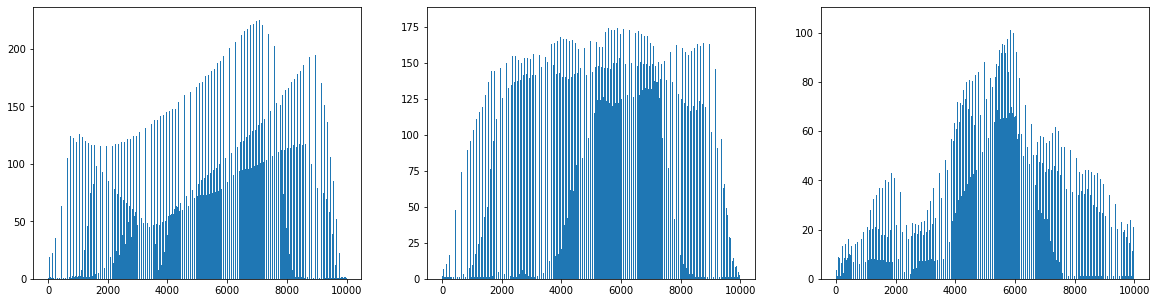

In [27]:
# 각 그림들의 평균 banana는 비지도학습에서 잘 잡아줄듯 ... 라벨링
# apple, pineapple 은 겹쳐져있는데.. 라벨링 가능?
# 각각 픽셀의 값을 평균

fig, axs = plt.subplots(1,3,figsize =(20,5))
# axis =0 으로 주면 사진의 값 평균이 아닌 각 픽셀의 값의 평균!
axs[0].bar(range(10000), np.mean(apple,axis=0)) # x축 10000개의 픽셀을 평균
axs[1].bar(range(10000), np.mean(pineapple,axis=0))
axs[2].bar(range(10000), np.mean(banana,axis=0))
plt.show()

In [29]:
# 사과 파인애플도 차이가 보여 비지도 학습을 구분 가능!

# 과일 사진 300 - 사과 평균

# 사과 평균 = 각각 픽셀 값의 평균으로 한다음 reshape로 사진처럼 바꾼다.
apple_mean = np.mean(apple,axis=0).reshape(100,100)
apple_mean

array([[1.01, 1.01, 1.01, ..., 1.  , 1.  , 1.  ],
       [1.01, 1.01, 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       ...,
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ],
       [1.  , 1.  , 1.  , ..., 1.  , 1.  , 1.  ]])

In [31]:
pineapple_mean = np.mean(pineapple,axis=0).reshape(100,100)
banana_mean = np.mean(banana,axis=0).reshape(100,100)

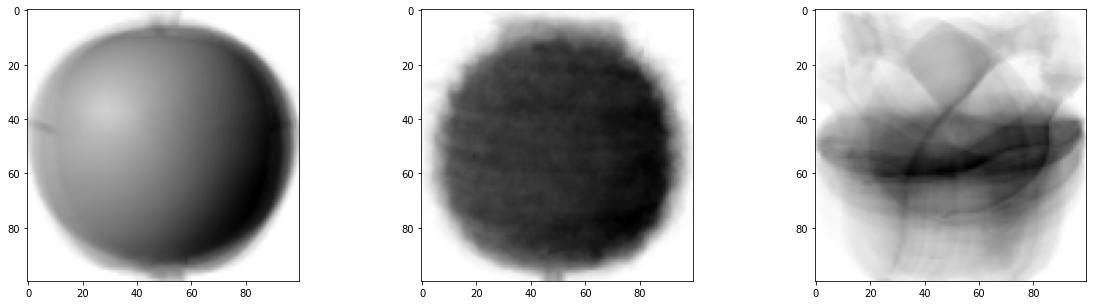

In [33]:
fig, axs = plt.subplots(1,3,figsize= (20,5))
axs[0].imshow(apple_mean,cmap='gray_r')
axs[1].imshow(pineapple_mean,cmap='gray_r')
axs[2].imshow(banana_mean,cmap='gray_r')

In [36]:
# 사과의 평균 그림 : 사과의 각 픽셀값의 평균을 내어 사진처럼 100,100

abs_diff = np.abs(fruits - apple_mean)
abs_diff.shape

(300, 100, 100)

In [39]:
abs_mean = np.mean(abs_diff,axis=(1,2)) # 가로100 세로100 평균 내겠다.
abs_mean # 만개의 픽셀값을 모두 평균냄

array([17.37576 , 13.508874, 17.183394, 15.68311 , 17.983306, 20.565392,
       16.795812, 16.144276, 19.611994, 21.32059 , 16.454222, 16.590134,
       13.37039 , 17.23263 , 15.92806 , 15.496638, 18.582212, 16.48196 ,
       27.651556, 19.7871  , 20.826912, 16.417934, 17.059946, 15.904296,
       15.086176, 19.371364, 24.076362, 14.777732, 19.20517 , 20.805182,
       14.797906, 18.658418, 15.973216, 13.04259 , 18.381052, 16.59904 ,
       16.288504, 18.960586, 13.88574 , 16.497594, 18.40376 , 19.174642,
       29.096702, 18.40849 , 28.223962, 21.42994 , 19.740466, 15.590532,
       13.082678, 18.765996, 14.391198, 21.464746, 26.261028, 15.887148,
       18.568706, 16.410426, 17.108034, 13.178824, 18.199846, 13.503056,
       20.845032, 16.898184, 22.81774 , 18.99896 , 19.102706, 16.636216,
       14.845644, 19.357872, 14.778086, 14.468082, 13.085526, 15.946606,
       20.42774 , 16.241996, 13.720382, 18.416166, 15.229106, 16.411342,
       13.47148 , 20.050622, 17.296816, 21.071312, 

In [40]:
apple_index = np.argsort(abs_mean)[:100]  # 평균 값을 정렬 가장 작은값부터 큰값까지의 index 값을 100개 까지만 가져오겠다.
# 사과 사진일수록 0 이고 0이랑 가까운 사진 100개 를 가져오 겠다.

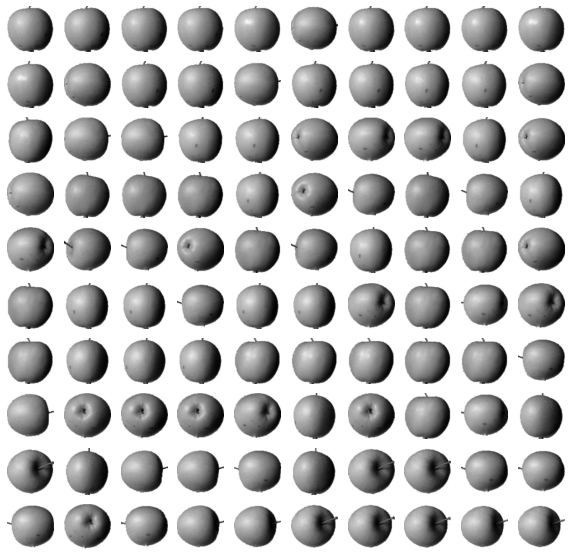

In [42]:
fig ,axs = plt.subplots(10,10, figsize = (10,10))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[apple_index[i*10+j]], cmap='gray_r')
    axs[i,j].axis('off')

plt.show()

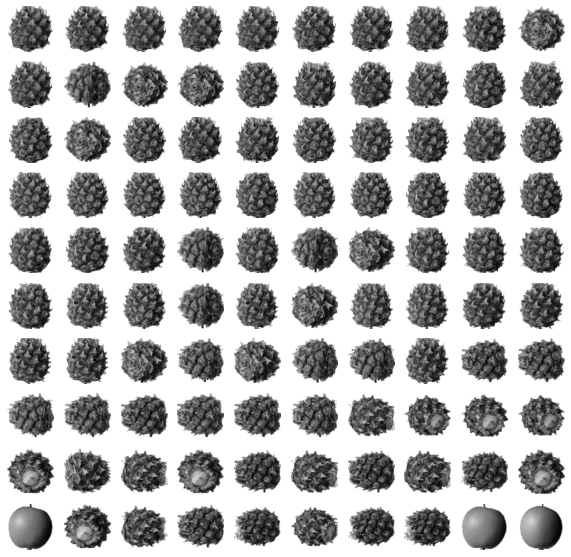

In [46]:
abs_diff = np.abs(fruits - pineapple_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

pineapple_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10,10, figsize = (10,10))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[pineapple_index[i*10+j]],cmap = 'gray_r')
    axs[i,j].axis('off')

plt.show()

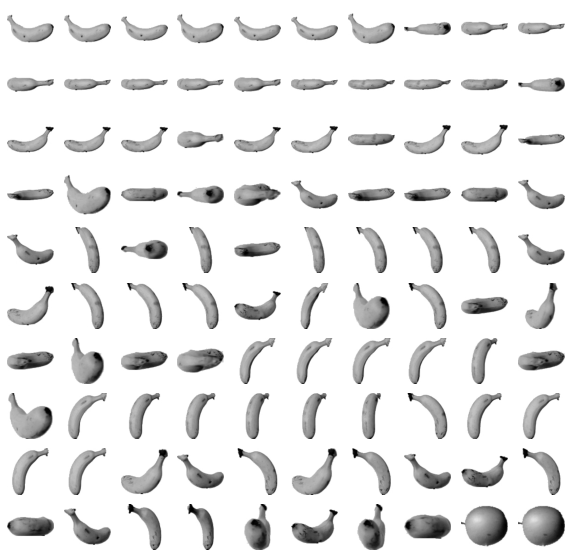

In [47]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1,2))

banana_index = np.argsort(abs_mean)[:100]

fig, axs = plt.subplots(10,10, figsize = (10,10))

for i in range(10):
  for j in range(10):
    axs[i,j].imshow(fruits[banana_index[i*10+j]],cmap = 'gray_r')
    axs[i,j].axis('off')

plt.show()